# Prototyping Notebook for the "The Rust and the Python" special coding session

In [1]:
import gaussian_mixtures as gmm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

data, _ = make_blobs(n_samples=10000, centers=10, n_features=2, random_state=9)
data.shape

(10000, 2)

In [3]:
model = gmm.initialize(data, 10)

for i in range(1000):
    r = gmm.expect(model, data)


    # Visual check 
    gmm.maximize_native(model, r, data)

    if i < 2:
        print(model.means)
        print(model.weights)
        print(model.covs)
    

[[-1.14621741 -1.50007541]
 [-1.24893302 -1.36289553]
 [-1.17374789 -1.44087315]
 [-1.06916266 -1.39297306]
 [-1.14677993 -1.2976923 ]
 [-1.24537916 -1.44540724]
 [-1.13287246 -1.3816481 ]
 [-1.11451717 -1.28857936]
 [-1.24822662 -1.36452183]
 [-1.10736862 -1.4704241 ]]
[0.10062845 0.10131628 0.09901849 0.1008335  0.1001307  0.09928514
 0.09938119 0.09946653 0.10057963 0.0993601 ]
[[[42.20456545 -4.19454648]
  [-4.19454648 28.31777494]]

 [[41.79982704 -3.63131562]
  [-3.63131562 28.1547622 ]]

 [[42.23874512 -4.01947367]
  [-4.01947367 28.21905802]]

 [[42.34981794 -3.84233265]
  [-3.84233265 28.29991156]]

 [[41.98796588 -3.62101525]
  [-3.62101525 28.29557455]]

 [[41.83514815 -3.21802852]
  [-3.21802852 27.7091405 ]]

 [[42.24171761 -3.59305736]
  [-3.59305736 28.09799199]]

 [[42.02846574 -3.31804444]
  [-3.31804444 28.20042291]]

 [[41.83279582 -4.02184938]
  [-4.02184938 28.41285448]]

 [[42.18706861 -3.90415214]
  [-3.90415214 28.18713305]]]
[[-1.13712069 -1.51414645]
 [-1.2550

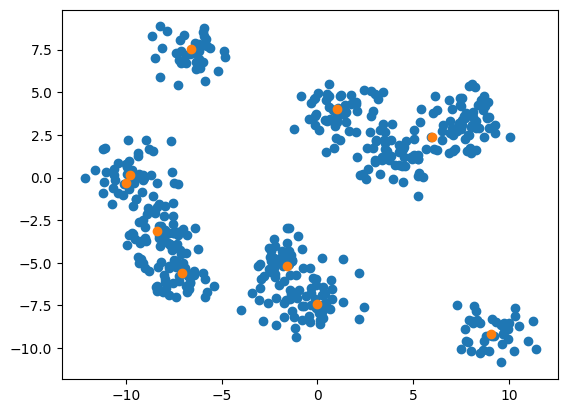

In [4]:
plt.scatter(data[:500,0],data[:500,1])
plt.scatter(model.means[:,0],model.means[:,1])


## Benchmarking

Check pure python with einsum

In [6]:
from sklearn.datasets import make_blobs

data, _ = make_blobs(n_samples=10000, centers=20, n_features=2, random_state=7)
model = gmm.initialize(data, 20)
print(",",model.means)
r = gmm.expect(model, data)

, [[-0.04452157  0.19089639]
 [ 0.03129171  0.00851185]
 [-0.02170053  0.10438947]
 [-0.08933863  0.16296063]
 [ 0.02201109  0.05646665]
 [-0.01941987  0.04738727]
 [-0.07348335  0.14637683]
 [-0.1419591   0.08902443]
 [-0.04484368  0.16525318]
 [-0.07436769  0.05821218]
 [-0.03734833  0.13498433]
 [ 0.00232714  0.15232829]
 [ 0.0131673   0.07557266]
 [-0.04919721  0.09410634]
 [ 0.04575343  0.05191742]
 [ 0.02012007  0.02477791]
 [-0.02060229  0.07945385]
 [ 0.00068912  0.13297135]
 [-0.06626026  0.08826888]
 [ 0.02187196  0.09612854]]


In [7]:
%%timeit 
gmm.maximize(model, r, data)

13.5 ms ± 842 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Check parallel Rust version

In [9]:
data, _ = make_blobs(n_samples=10000, centers=20, n_features=2, random_state=7)


model = gmm.initialize(data, 20)
print(",",model.means)
r = gmm.expect(model, data)

, [[-0.13343934  0.08240242]
 [-0.04601767  0.03045128]
 [ 0.10317481  0.0038155 ]
 [ 0.02233952  0.1271833 ]
 [ 0.00686654  0.19913198]
 [ 0.00057605  0.18348105]
 [-0.12371887  0.16944331]
 [-0.01720277  0.08428282]
 [-0.02798312  0.02093746]
 [-0.00731924  0.06956211]
 [-0.06179413  0.13474837]
 [ 0.03989593  0.06159412]
 [-0.00986522  0.04229737]
 [-0.04988429  0.04404135]
 [-0.09614234  0.18656735]
 [-0.04128932  0.12930137]
 [-0.07369747  0.15553621]
 [ 0.04069594 -0.00215379]
 [-0.06267468  0.16695748]
 [ 0.01065315  0.07256517]]


In [11]:
%%timeit 
gmm.maximize_native(model, r, data)

3.17 ms ± 67 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
